In [1]:
from keras.datasets import imdb

(train_data,train_lable),(test_data,test_lable) = imdb.load_data(num_words=10000)
data_index = imdb.get_word_index()
# 翻转字典
rever_data = dict((v,k) for (k,v) in data_index.items())
# 可以输出评论
# decoded = ' '.join([rever_data.get(i - 3, '?') for i in train_data[1]])


Using TensorFlow backend.


In [2]:
# 处理输入神经网络的数据
import numpy as np

def toVector(data, size = 10000):
    res = np.zeros((len(data),size)) # shape为 (,)的矩阵
    for i,num in enumerate(data):
        res[i,num] = 1
    return res
# 将评论数据转化为 10000维是否出现数据
x_train = toVector(train_data)
x_test = toVector(test_data)

y_train = np.asarray(train_lable).astype('float32')
y_test = np.asarray(test_lable).astype('float32')

In [1]:
# 搭建神经网络
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))# 16个小朋友 每个有10000个参数
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
x_val = x_train[:10000]
x_toTrain = x_train[10000:]

y_val = y_train[:10000]
y_toTrain = y_train[10000:]

his = model.fit(x_toTrain, y_toTrain, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 242us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
11776/15000 [======================>.......] - ETA: 0s - loss: 0.2202 - acc: 0.9279

KeyboardInterrupt: 

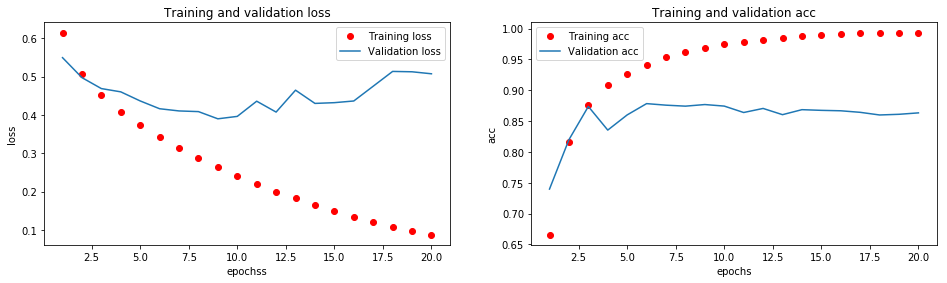

In [7]:
### 生成图像分析
import matplotlib.pyplot as plt
%matplotlib inline

l_val_loss = his.history['val_loss']
l_val_acc = his.history['val_acc']
l_loss = his.history['loss']
l_acc = his.history['acc']

epochs = range(1,len(l_acc)+1)

plt.figure(figsize=(16, 9)) # 设置图表大小
plt.subplot(222) # 拆分子块
plt.plot(epochs, l_acc, 'ro', label='Training acc') # 'bo'蓝点
plt.plot(epochs, l_val_acc, label='Validation acc') # 'b'蓝线

plt.title('Training and validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()

plt.subplot(221)
plt.plot(epochs, l_loss, 'ro', label='Training loss') # 'bo'蓝点
plt.plot(epochs, l_val_loss, label='Validation loss') # 'b'蓝线

plt.title('Training and validation loss')
plt.xlabel('epochss')
plt.ylabel('loss')
plt.legend()

plt.show()

In [9]:
# 2层网络 测试迭代3次的精度最高
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))# 16个小朋友 每个有10000个参数
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])
x_val = x_train[:10000]
x_toTrain = x_train[10000:]

y_val = y_train[:10000]
y_toTrain = y_train[10000:]

his = model.fit(x_toTrain, y_toTrain, epochs=6, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 2s 151us/step - loss: nan - acc: 0.0175 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/6
15000/15000 [==============================] - 2s 137us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/6
15000/15000 [==============================] - 2s 137us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/6
15000/15000 [==============================] - 2s 139us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/6
15000/15000 [==============================] - 2s 144us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/6
15000/15000 [==============================] - 2s 140us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00


In [30]:
# 在测试集上进行测试
res = model.predict(x_test)
all = len(res)
ture = 0
for i,acc in enumerate(res):
    if(acc < 0.5):
        acc = 0
    else:
        acc = 1
    if(y_test[i] == acc):
        ture = ture+1
print(ture/all) # 输出正确率

0.88528


 
## 下面是实验的代码

In [20]:
# 采用三层网络 3-5次迭代后 精度88
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))# 16个小朋友 每个有10000个参数
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])
x_val = x_train[:10000]
x_toTrain = x_train[10000:]

y_val = y_train[:10000]
y_toTrain = y_train[10000:]

his = model.fit(x_toTrain, y_toTrain, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 169us/step - loss: 0.5595 - acc: 0.7615 - val_loss: 0.4065 - val_acc: 0.8637
Epoch 2/4
15000/15000 [==============================] - 2s 123us/step - loss: 0.3155 - acc: 0.8978 - val_loss: 0.3027 - val_acc: 0.8858
Epoch 3/4
15000/15000 [==============================] - 2s 123us/step - loss: 0.2161 - acc: 0.9282 - val_loss: 0.2906 - val_acc: 0.8817
Epoch 4/4
15000/15000 [==============================] - 2s 125us/step - loss: 0.1607 - acc: 0.9464 - val_loss: 0.2870 - val_acc: 0.8856


In [8]:
# 采用32个神经元 精度没有提高
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))# 16个小朋友 每个有10000个参数
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])
x_val = x_train[:10000]
x_toTrain = x_train[10000:]

y_val = y_train[:10000]
y_toTrain = y_train[10000:]

his = model.fit(x_toTrain, y_toTrain, epochs=3, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 2s 150us/step - loss: 0.6085 - acc: 0.7255 - val_loss: 0.5327 - val_acc: 0.8196
Epoch 2/3
15000/15000 [==============================] - 2s 120us/step - loss: 0.4681 - acc: 0.8708 - val_loss: 0.4391 - val_acc: 0.8626
Epoch 3/3
15000/15000 [==============================] - 2s 138us/step - loss: 0.3726 - acc: 0.9024 - val_loss: 0.3735 - val_acc: 0.8757


In [11]:
# 采用mse损失函数
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))# 16个小朋友 每个有10000个参数
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['acc'])
x_val = x_train[:10000]
x_toTrain = x_train[10000:]

y_val = y_train[:10000]
y_toTrain = y_train[10000:]

his = model.fit(x_toTrain, y_toTrain, epochs=10, batch_size=512, validation_data=(x_val, y_val))

ValueError: You are passing a target array of shape (15000, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

### 过拟合实验

In [24]:
# L1 L2正则化
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,),kernel_regularizer = regularizers.l2(0.001)))# 16个小朋友 每个有10000个参数
model.add(layers.Dense(16, activation = 'relu',kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])
x_val = x_train[:10000]
x_toTrain = x_train[10000:]

y_val = y_train[:10000]
y_toTrain = y_train[10000:]

his = model.fit(x_toTrain, y_toTrain, epochs=3, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 2s 159us/step - loss: 0.6009 - acc: 0.7891 - val_loss: 0.4711 - val_acc: 0.8717
Epoch 2/3
15000/15000 [==============================] - 2s 136us/step - loss: 0.4025 - acc: 0.9012 - val_loss: 0.4694 - val_acc: 0.8438
Epoch 3/3
15000/15000 [==============================] - 2s 142us/step - loss: 0.3351 - acc: 0.9229 - val_loss: 0.3831 - val_acc: 0.8883


In [29]:
# dropout正则化
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))# 16个小朋友 每个有10000个参数
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])
x_val = x_train[:10000]
x_toTrain = x_train[10000:]

y_val = y_train[:10000]
y_toTrain = y_train[10000:]

his = model.fit(x_toTrain, y_toTrain, epochs=6, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 3s 186us/step - loss: 0.6378 - acc: 0.6363 - val_loss: 0.5155 - val_acc: 0.8442
Epoch 2/6
15000/15000 [==============================] - 2s 130us/step - loss: 0.5139 - acc: 0.7737 - val_loss: 0.4040 - val_acc: 0.8712
Epoch 3/6
15000/15000 [==============================] - 2s 131us/step - loss: 0.4218 - acc: 0.8311 - val_loss: 0.3372 - val_acc: 0.8834
Epoch 4/6
15000/15000 [==============================] - 2s 141us/step - loss: 0.3553 - acc: 0.8681 - val_loss: 0.2969 - val_acc: 0.8896
Epoch 5/6
15000/15000 [==============================] - 2s 132us/step - loss: 0.3060 - acc: 0.8914 - val_loss: 0.2778 - val_acc: 0.8919
Epoch 6/6
15000/15000 [==============================] - 2s 132us/step - loss: 0.2621 - acc: 0.9082 - val_loss: 0.2709 - val_acc: 0.8907
